<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
#pip install seaborn

import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

<ipython-input-1-6cbf8d3c5627>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


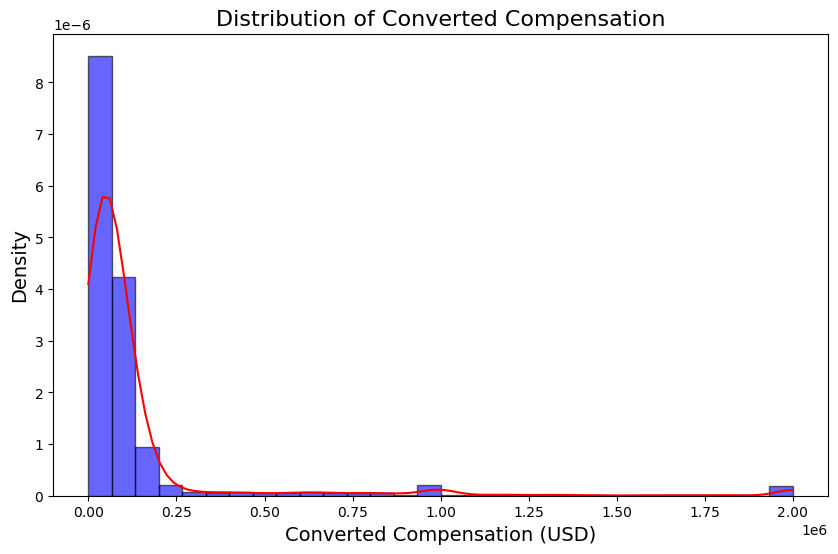

In [7]:
# your code goes here

cleaned_converted_comp = df['ConvertedComp'].dropna().replace([np.inf, -np.inf], np.nan).dropna()
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(cleaned_converted_comp, bins=30, alpha=0.6, color='blue', edgecolor='black', density=True)

# Calculate KDE
kde = gaussian_kde(cleaned_converted_comp)
x = np.linspace(cleaned_converted_comp.min(), cleaned_converted_comp.max(), 100)
plt.plot(x, kde(x), color='red')

plt.title('Distribution of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation (USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()


Plot the histogram for the column `ConvertedComp`.


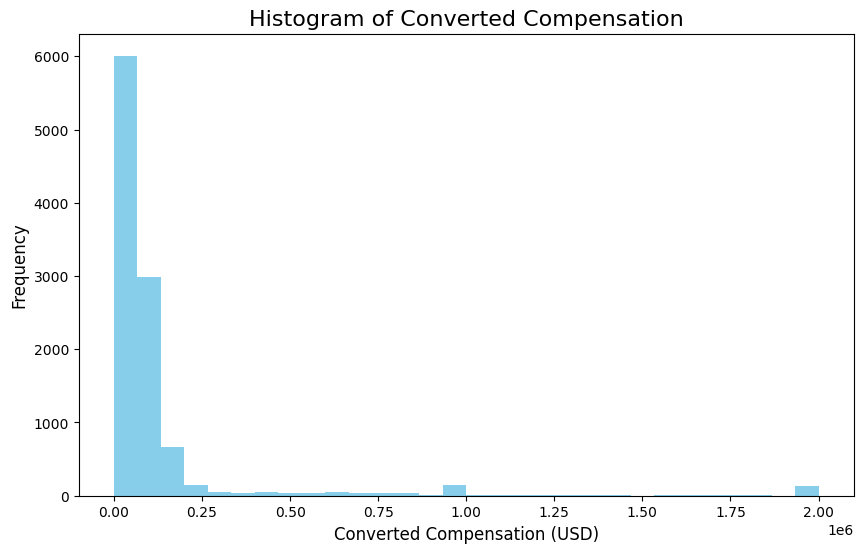

In [8]:
# your code goes here

# Drop missing values in the 'ConvertedComp' column
df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue')

# Add titles and labels
plt.title('Histogram of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here

df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here

df[df['Gender'] == 'Man'].shape[0]


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
# Filter the dataframe for respondents who identified themselves as 'Woman'
women = df[df['Gender'] == 'Woman']

# Calculate the median of 'ConvertedComp' for these respondents
median = women['ConvertedComp'].median()

median

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
min = df['Age'].min()
q1 = df['Age'].quantile(0.25)
median = df['Age'].median()
q3 = df['Age'].quantile(0.75)
max = df['Age'].max()

# Print the results
print(f"Five-number summary for Age:")
print(f"Minimum: {min}")
print(f"First Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum: {max}")

Five-number summary for Age:
Minimum: 16.0
First Quartile (Q1): 25.0
Median (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


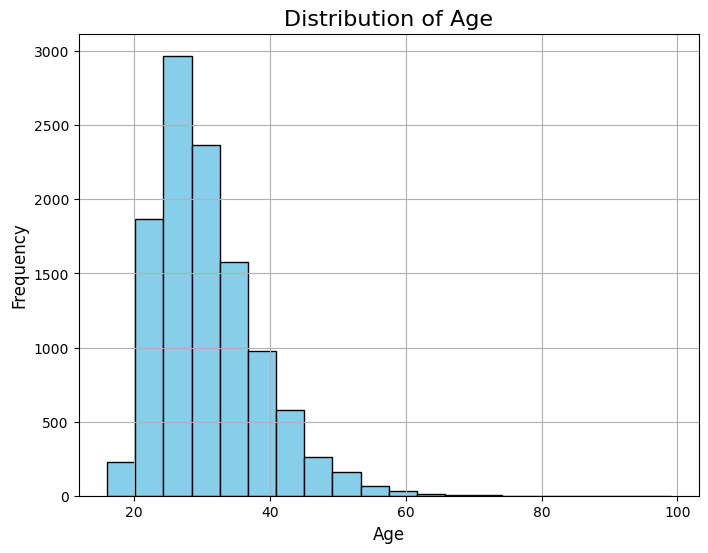

In [13]:
# your code goes here

# Plot the histogram for the 'Age' column
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


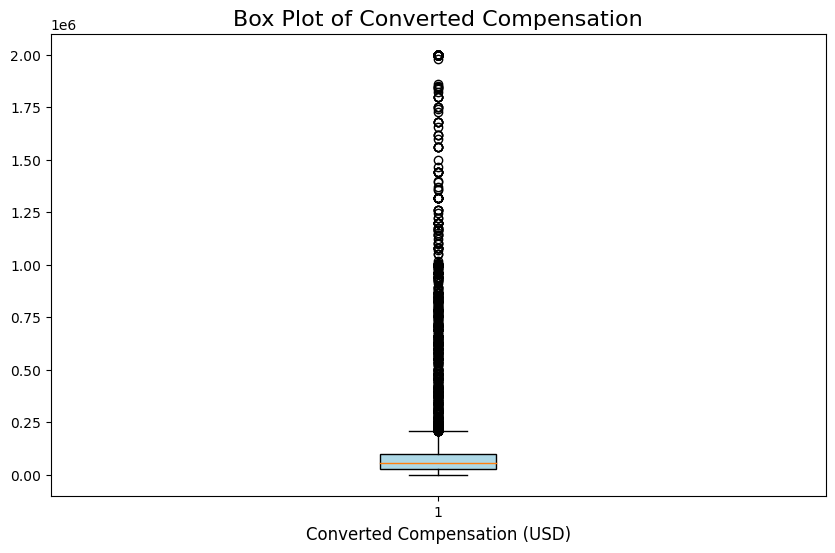

In [14]:
# your code goes here

# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add titles and labels
plt.title('Box Plot of Converted Compensation', fontsize=16)
plt.xlabel('Converted Compensation (USD)', fontsize=12)

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
iqr

73132.0

Find out the upper and lower bounds.


In [16]:
# your code goes here

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Print the results
print(f"The lower bound for ConvertedComp is: {lower_bound}")
print(f"The upper bound for ConvertedComp is: {upper_bound}")


The lower bound for ConvertedComp is: -82830.0
The upper bound for ConvertedComp is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
# Count the number of outliers
df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
# Create a new dataframe by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new dataframe to verify the removal of outliers
print(f"The shape of the original dataframe: {df.shape}")
print(f"The shape of the new dataframe without outliers: {df_no_outliers.shape}")


The shape of the original dataframe: (11398, 85)
The shape of the new dataframe without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
# Filter the DataFrame to only include numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation values for the 'Age' column
age_correlation = correlation_matrix['Age']

# Display the correlation matrix and age correlation
print(correlation_matrix)
print(age_correlation)

#Overall, the correlations in the matrix indicate mostly weak relationships among the variables.
#The strongest correlation in the matrix is between ConvertedComp and Age, but it’s still relatively weak. This suggests that while age might have a slight impact on compensation, other factors likely play a more significant role. The relationships between compensation and work hours are also weak, indicating that the amount of time worked does not strongly influence the compensation rates.

               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.013490       0.002181    -0.015314    0.004621   
CompTotal       -0.013490   1.000000       0.001037     0.003510    0.007063   
ConvertedComp    0.002181   0.001037       1.000000     0.021143   -0.033865   
WorkWeekHrs     -0.015314   0.003510       0.021143     1.000000    0.026517   
CodeRevHrs       0.004621   0.007063      -0.033865     0.026517    1.000000   
Age              0.004041   0.006970       0.105386     0.036518   -0.020469   

                    Age  
Respondent     0.004041  
CompTotal      0.006970  
ConvertedComp  0.105386  
WorkWeekHrs    0.036518  
CodeRevHrs    -0.020469  
Age            1.000000  
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
